In [4]:
import json
from pathlib import Path


path = Path("../data/cuts/")
cuts = path.glob('**/*[_signer].json')

scores = []
for idx, cut in enumerate(cuts):
    with cut.open() as datafile:
        line = ""
        while ']' not in line:
            line += datafile.readline()
        line = line[:-2] + '}'
        signer_data = json.loads(line)
    scores.append(signer_data["scores"])

count    13975.000000
mean         2.567728
std          2.574434
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         29.000000
dtype: float64

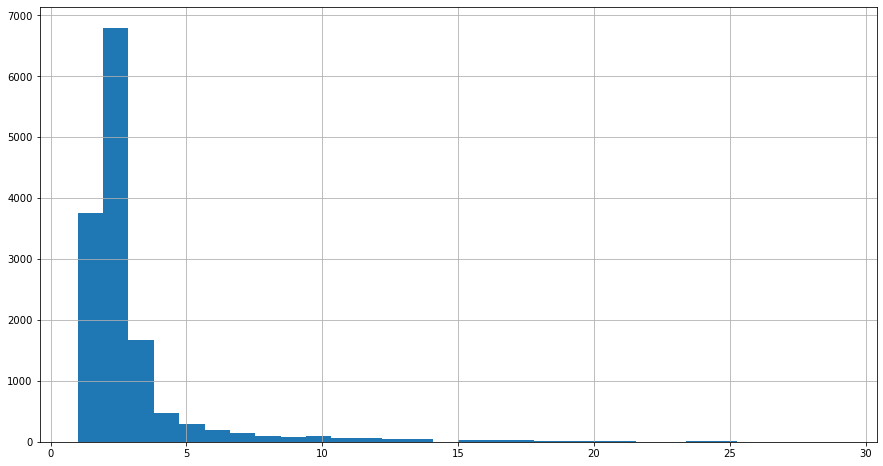

In [6]:
import pandas as pd

signers_s = pd.Series(map(len, scores))
display(signers_s.describe())
signers_fig = signers_s.hist(bins=30,figsize=(15,8))
signers_fig.get_figure().savefig(Path("../data/graphs/signers/signers_hist.png").resolve())


count    10223.000000
mean         0.872520
std          0.225623
min          0.000000
25%          0.859904
50%          0.987699
75%          1.000000
max          1.000000
dtype: float64

<AxesSubplot:>

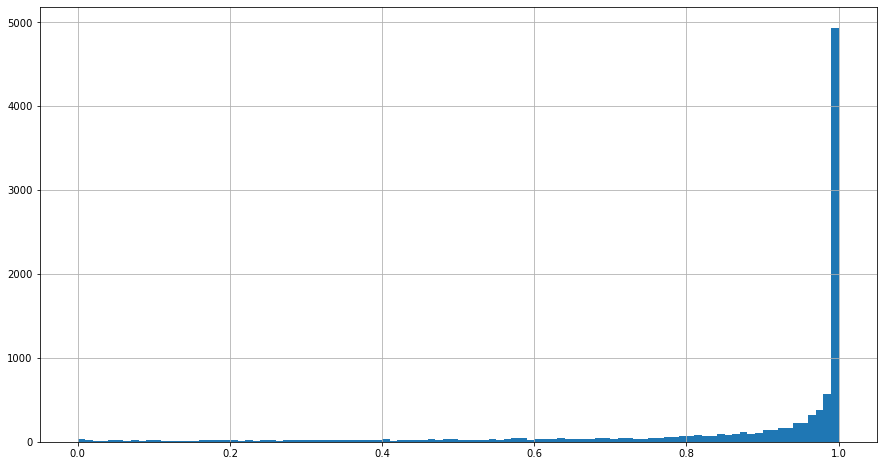

In [3]:
import pandas as pd
from IPython.display import display


def get_score(scores: list[float]):
    m1 = max(scores)
    scores = scores.copy()
    scores.remove(m1)
    return 0 if m1 == 0 else (m1 - max(scores)) / m1

scores_s = pd.Series(map(get_score, filter(lambda s: len(s) >= 2, scores)))
display(scores_s.describe())
scores_fig = scores_s.hist(bins=100,figsize=(15,8))
display(scores_fig)
scores_fig.get_figure().savefig(Path("../data/graphs/signers/scores.png").resolve())

count    6798.000000
mean        0.857362
std         0.239951
min         0.000000
25%         0.825102
50%         0.988101
75%         1.000000
max         1.000000
dtype: float64

<AxesSubplot:>

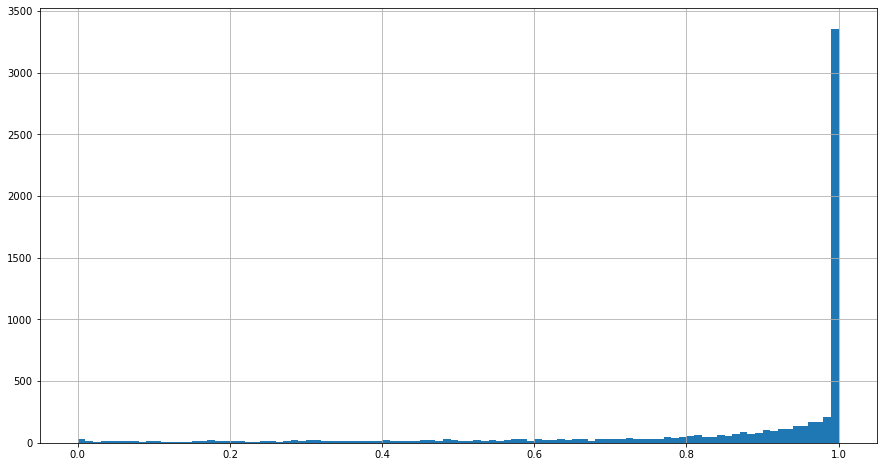

In [4]:
scores_2_s = pd.Series(map(get_score, filter(lambda s: len(s) == 2, scores)))
display(scores_2_s.describe())
scores_2_fig = scores_2_s.hist(bins=100,figsize=(15,8))
display(scores_2_fig)
scores_2_fig.get_figure().savefig(Path("../data/graphs/signers/scores2.png").resolve())

count    3425.000000
mean        0.902606
std         0.190569
min         0.000406
25%         0.920597
50%         0.987386
75%         1.000000
max         1.000000
dtype: float64

<AxesSubplot:>

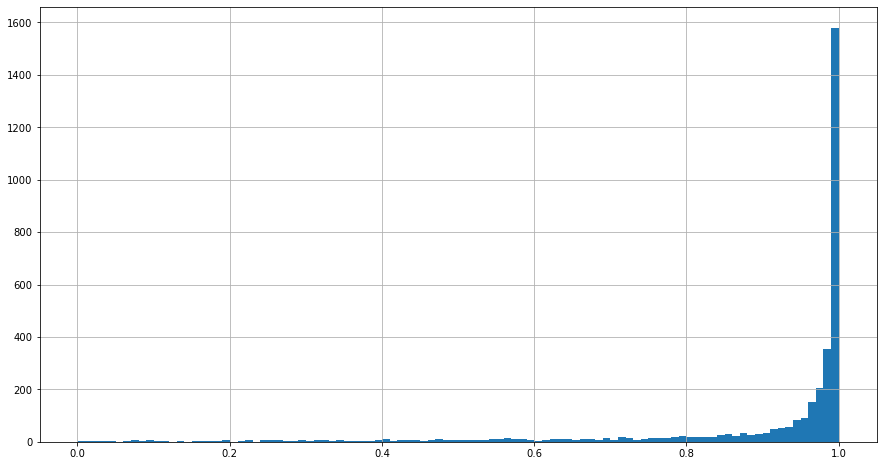

In [5]:
scores_gt2_s = pd.Series(map(get_score, filter(lambda s: len(s) > 2, scores)))
display(scores_gt2_s.describe())
scores_gt2_fig = scores_gt2_s.hist(bins=100,figsize=(15,8))
display(scores_gt2_fig)
scores_gt2_fig.get_figure().savefig(Path("../data/graphs/signers/scores_gt2.png").resolve())